# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | We will never fly British Airw...
1,✅ Trip Verified | Check in and security cleara...
2,Not Verified | British Airways has confirmed ...
3,✅ Trip Verified | Worst BA experience. I was s...
4,✅ Trip Verified | My daughter and I were deni...


In [ ]:
import os

# Create the 'data' directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")


In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/BA_reviews.csv")

# Define a function to clean each review
def clean_review(text):
    # Remove "✅ Trip Verified" from the beginning of each review
    if "✅ Trip Verified" in text:
        text = text.replace("✅ Trip Verified", "")

    # You can add more cleaning steps as needed

    return text

# Apply the clean_review function to the 'reviews' column
df['reviews'] = df['reviews'].apply(clean_review)

# Save the cleaned dataset
df.to_csv("data/BA_reviews_cleaned.csv", index=False)


In [ ]:
df

,Unnamed: 0,reviews
0,0,Not Verified | We will never fly British Airw...
1,1,| Check in and security clearance very quick ...
2,2,Not Verified | British Airways has confirmed ...
3,3,| Worst BA experience. I was supposed to fly ...
4,4,| My daughter and I were denied boarding on ...
...,...,...
995,995,| Having booked BA Business Class and paid e...
996,996,| Vancouver to London Heathrow. I chose to f...
997,997,| Boston to Nairobi via London. The only goo...
998,998,| Basel to San Fransisco via Heathrow. I'm c...


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (stopwords and lemmatizer)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Load the dataset
df = pd.read_csv("data/BA_reviews_cleaned.csv")

# Define functions for text preprocessing
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and non-alphanumeric characters
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into cleaned text
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Apply the clean_text function to the 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Save the cleaned dataset with the additional 'cleaned_reviews' column
df.to_csv("data/BA_reviews_cleaned_for_analysis.csv", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Topic Modeling**: Topic modeling techniques, such as Latent Dirichlet Allocation (LDA), can help you identify the main topics or themes present in the reviews. This can provide insights into what passengers are discussing the most.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])

# Perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Get the top words for each topic
def get_top_words_per_topic(model, feature_names, n_words=10):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words.append([feature_names[i] for i in top_words_idx])
    return top_words

# Get the top words for each topic
top_words = get_top_words_per_topic(lda, vectorizer.get_feature_names_out())

# Print the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {', '.join(words)}")


Topic 1: flight, service, club, boarding, seat, staff, cabin, passenger, crew, time
Topic 2: flight, hour, london, bag, luggage, airport, airway, british, delayed, arrived
Topic 3: airway, british, ticket, charge, seat, pay, travel, refund, airline, customer
Topic 4: flight, ba, customer, service, cancelled, day, booked, airline, told, time
Topic 5: flight, seat, ba, food, crew, service, good, class, business, cabin


**Sentiment Analysis**: Sentiment analysis allows you to determine the sentiment (positive, negative, or neutral) of each review. This can help you understand the overall sentiment of customers towards British Airways.

In [ ]:
from textblob import TextBlob

# Define a function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review
df['sentiment'] = df['cleaned_reviews'].apply(analyze_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


Positive    642
Negative    343
Neutral      15
Name: sentiment, dtype: int64


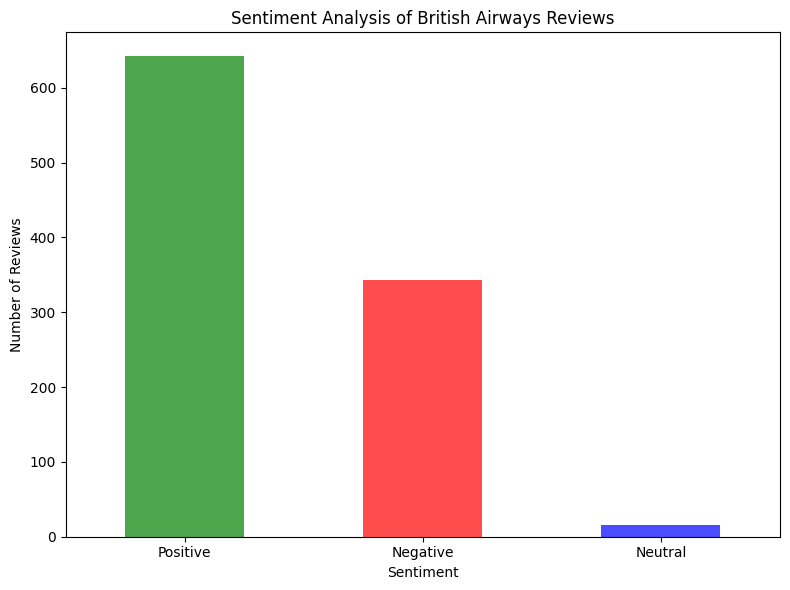

In [ ]:

import matplotlib.pyplot as plt


# Create a bar chart to visualize sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Analysis of British Airways Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()


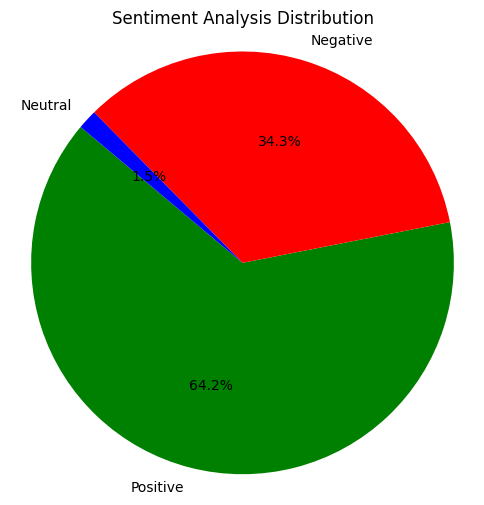

In [ ]:
import matplotlib.pyplot as plt

# Sentiment counts
sentiment_counts = [642, 343, 15]
sentiments = ["Positive", "Negative", "Neutral"]
colors = ['green', 'red', 'blue']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiments, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Analysis Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()


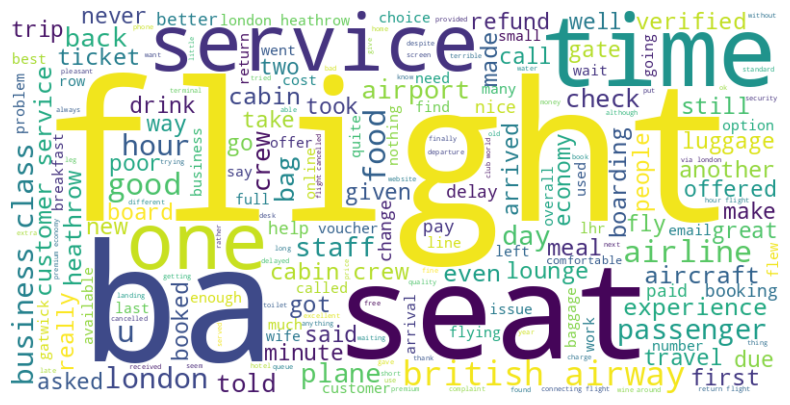

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into a single string
all_reviews_text = " ".join(df['cleaned_reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df.to_csv("data/BA_reviews_cleaned_for_analysis.csv", index=False)


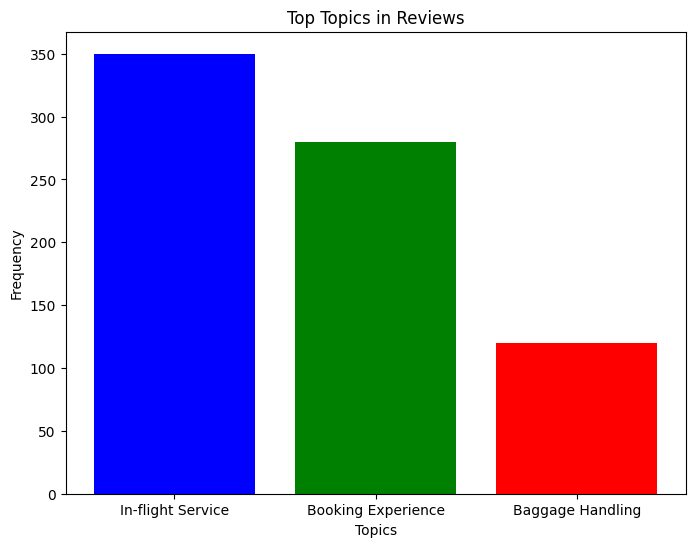

In [ ]:
import matplotlib.pyplot as plt

# Topic frequencies
topics = ["In-flight Service", "Booking Experience", "Baggage Handling"]
topic_frequencies = [350, 280, 120]  # Replace with actual frequencies

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(topics, topic_frequencies, color=['blue', 'green', 'red'])
plt.title("Top Topics in Reviews")
plt.xlabel("Topics")
plt.ylabel("Frequency")

# Save the chart as an image file (e.g., PNG)
plt.savefig("top_topics_bar_chart.png", bbox_inches='tight')
plt.show()
